# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path


## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
lending_df = pd.read_csv('resources/lending_data.csv')
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
lending_df.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

In [5]:
from matplotlib import pyplot as plt

/var/folders/_h/jhdyq0c51ngfxyxtsgdfwtjw0000gn/T/ipykernel_17914/3347488549.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  lending_df.hist(ax=ax)


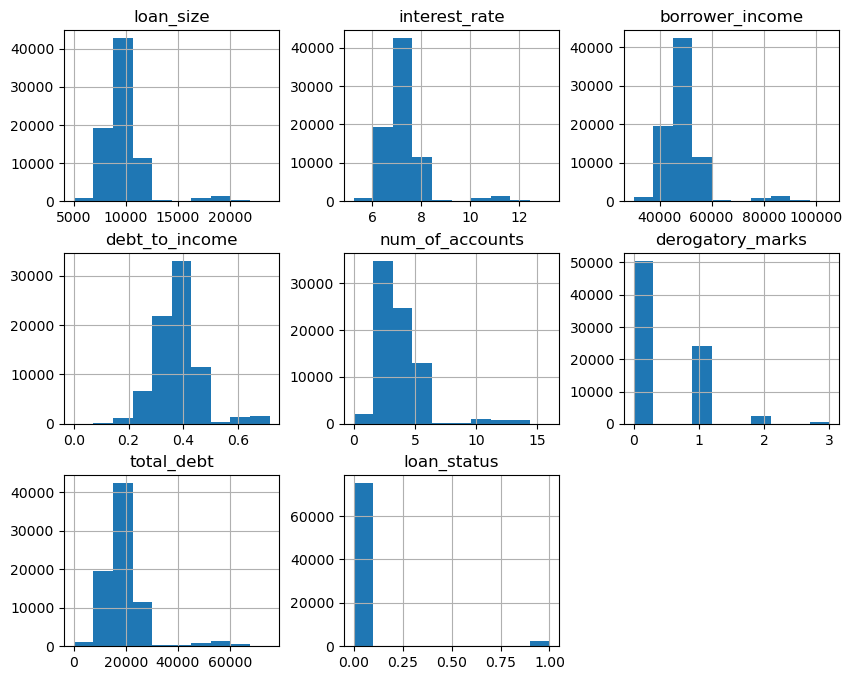

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
lending_df.hist(ax=ax)
plt.show()

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split


AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DistanceMetric32'

In [ ]:
y = lending_df['loan_status'].values
X = lending_df.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X.head()

In [ ]:
np.unique(y)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [ ]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

In [ ]:
logistic_regression = classifier.fit(X_train, y_train)

print(f"Training Data Score: {logistic_regression.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression.score(X_test, y_test)}")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (563 + 18663) / (563 + 102 + 18663 + 56)
print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, support=True, size=(720, 500))

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show()            


In [ ]:
# Train a Random Forest Classifier model and print the model score
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


In [ ]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

In [ ]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


In [ ]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}') 

In [ ]:
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

# Analysis

The dataset does not contain any null values and consists of integers or floats, so minimal data cleansing was required before testing.

The data presents a positive trend which is shown with the use of a histogram.


# Logistic Regression Model

After testing the two models head to head, it's clear that logistic regression presents a higher level of accuracy.

Comparing traditional classification report with the use of GaussianNB Classification Report, interestingly presents slightly different data

# Random Forest Classifier

When we compare both training and testing scores, it becomes clear that there is not a significant difference between the two models.

The bar chart provides a visual representation of the features. Interestingly, Feature 5 performed the worst while Feature 1 performed significantly better.

# Overall

Both models show signs of positive trends

Although there wasn't a significant difference between both training models, it is clear Logistic Regression Model peformed better than the Random Forest Classifier